In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load dataset
df = pd.read_excel("/home/fariz/Works/Malayalam-Emotion-Detector/github_test/Emotions data.xlsx")

In [4]:
# Ensure dataset has the necessary columns
print("Dataset columns:", df.columns)

# Assume 'text' contains the Malayalam sentences and 'label' contains class labels
X = df['Text']
y = df['Emotion']

Dataset columns: Index(['Text', 'Emotion'], dtype='object')


In [5]:
# Text vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\b\w+\b')
X_vectorized = vectorizer.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [7]:
# Train Naïve Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [8]:
# Predictions
y_pred = clf.predict(X_test)

In [9]:
# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Abusive       0.27      0.26      0.27       189
       Anger       0.26      0.44      0.33       205
  Excitement       0.34      0.20      0.25       217
        Fear       0.33      0.31      0.32       211
       Happy       0.36      0.38      0.37       195
      Humour       0.24      0.17      0.20       192
        Love       0.44      0.41      0.42       174
         Sad       0.25      0.34      0.29       198
     Sarcasm       0.17      0.19      0.18       208
    Surprise       0.27      0.18      0.22       211

    accuracy                           0.29      2000
   macro avg       0.29      0.29      0.28      2000
weighted avg       0.29      0.29      0.28      2000



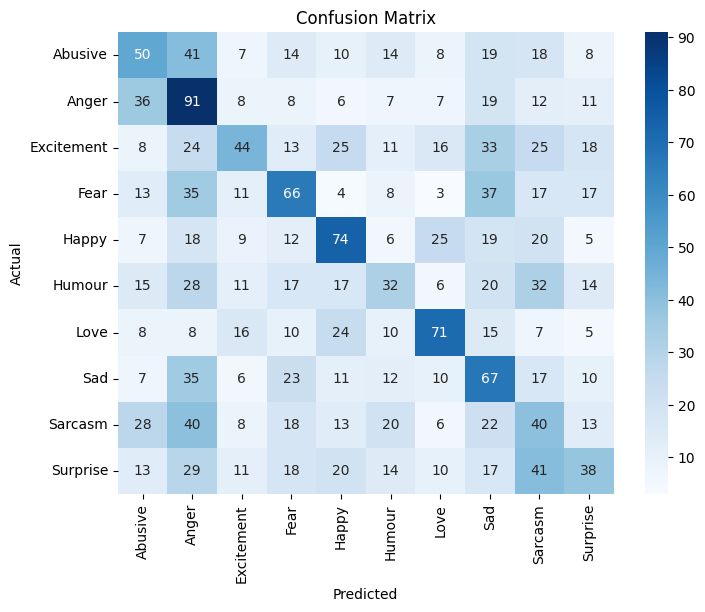

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Save trained model and vectorizer for future use
joblib.dump(clf, "malayalam_text_classifier_naivebayes+tfidf.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_classifier_naivebayes+tfidf.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
